In [33]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
# read csv
df = pd.read_csv('filtered_music_data_with_librosa.csv')

In [34]:
print("Total # of Observations: ", df.shape[0])

# Drop Features: duration, time signature, mode, preview_url, id
df.drop(columns=["id", "mode", "duration_ms", "time_signature", "preview_url"], inplace=True)


Total # of Observations:  3930


In [35]:
# Drop Outliers

for col in df.columns[1:]:
    column = df[col]
    mean = column.mean()
    std = column.std()
    outliers = (column < mean - 3 * std) | (column > mean + 3 * std)
    print(col, ":", df[outliers].shape[0], "outliers")
    df = df[~outliers]

print("Total # of Observations without Outliers: ", df.shape[0])

# Extract Target Feature

encoder = LabelEncoder()
genre = df['genre']
df.drop(columns=['genre'], inplace=True)
genre_encoded = encoder.fit_transform(genre)

danceability : 0 outliers
energy : 0 outliers
key : 0 outliers
loudness : 95 outliers
speechiness : 76 outliers
acousticness : 0 outliers
instrumentalness : 0 outliers
liveness : 88 outliers
valence : 0 outliers
tempo : 5 outliers
mfcc_1Mean : 76 outliers
mfcc_2Mean : 87 outliers
mfcc_3Mean : 16 outliers
mfcc_4Mean : 32 outliers
mfcc_5Mean : 20 outliers
mfcc_6Mean : 20 outliers
mfcc_7Mean : 12 outliers
mfcc_8Mean : 23 outliers
mfcc_9Mean : 22 outliers
mfcc_10Mean : 24 outliers
mfcc_11Mean : 25 outliers
mfcc_12Mean : 23 outliers
mfcc_13Mean : 16 outliers
chroma_1Mean : 6 outliers
chroma_2Mean : 12 outliers
chroma_3Mean : 11 outliers
chroma_4Mean : 6 outliers
chroma_5Mean : 6 outliers
chroma_6Mean : 10 outliers
chroma_7Mean : 4 outliers
chroma_8Mean : 5 outliers
chroma_9Mean : 7 outliers
chroma_10Mean : 8 outliers
chroma_11Mean : 4 outliers
chroma_12Mean : 6 outliers
Total # of Observations without Outliers:  3185


array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'mfcc_1Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_2Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_3Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_4Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_5Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_6Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_7Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_8Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_9Mean'}>],
      

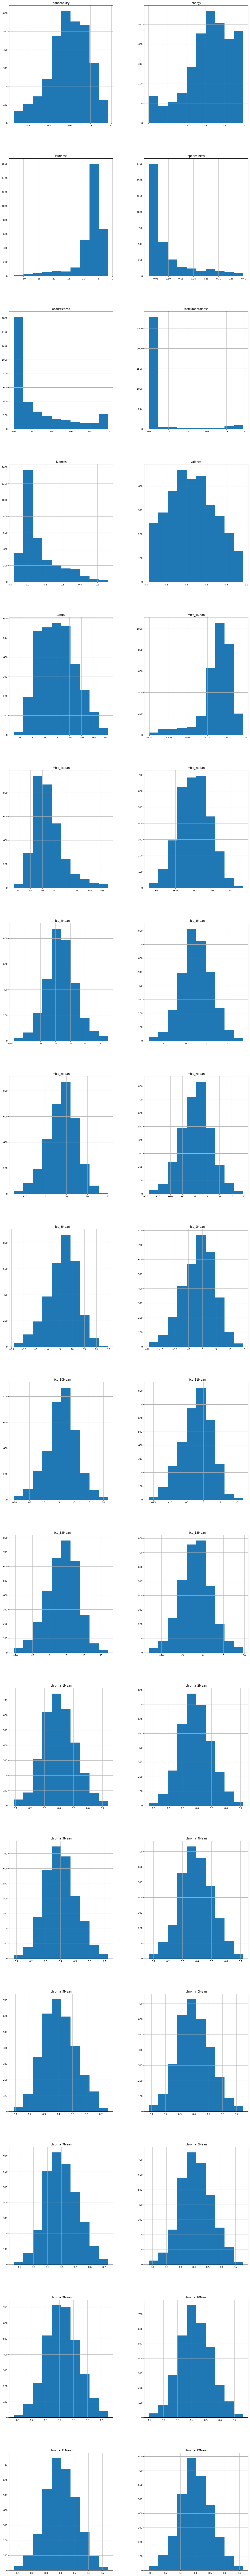

In [36]:
# Plot Distributions
fig, axis = plt.subplots(17, 2)

fig.set_size_inches(18.5, 200)
df_without_key = df.drop(columns=["key"])
df_without_key.hist(ax=axis)

In [29]:
# Feature Scaling

# Normalization: 

norm_cols = ['danceability','loudness', 'valence', 'tempo',
 'mfcc_1Mean',
 'mfcc_2Mean',
 'mfcc_3Mean',
 'mfcc_4Mean',
 'mfcc_5Mean',
 'mfcc_6Mean',
 'mfcc_7Mean',
 'mfcc_8Mean',
 'mfcc_9Mean',
 'mfcc_10Mean',
 'mfcc_11Mean',
 'mfcc_12Mean',
 'mfcc_13Mean',
 'chroma_1Mean',
 'chroma_2Mean',
 'chroma_3Mean',
 'chroma_4Mean',
 'chroma_5Mean',
 'chroma_6Mean',
 'chroma_7Mean',
 'chroma_8Mean',
 'chroma_9Mean',
 'chroma_10Mean',
 'chroma_11Mean',
 'chroma_12Mean']

min_max = MinMaxScaler()
scaler = StandardScaler()

df[norm_cols] = scaler.fit_transform(df[norm_cols])

# Standardization
std_cols = ['energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

df[std_cols] = min_max.fit_transform(df[std_cols])

array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'mfcc_1Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_2Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_3Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_4Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_5Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_6Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_7Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_8Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_9Mean'}>],
      

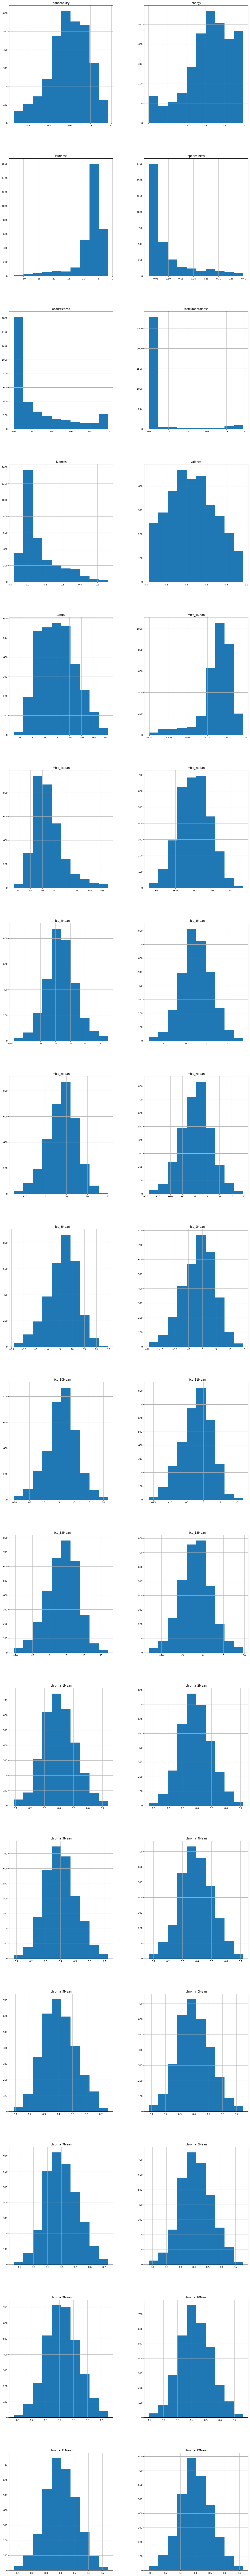

In [22]:
# Plot Scaled Distributions
fig, axis = plt.subplots(17, 2)

fig.set_size_inches(18.5, 200)

df_without_key = df.drop(columns=["key"])

df_without_key.hist(ax=axis)

In [37]:
# Convert to CSV for MFCC/Chroma Data
genre_dict = { 'genre_encoded': genre_encoded}
genre_df =  pd.DataFrame(genre_dict)
df_without_key = pd.concat([df_without_key, genre_df], axis=1)
df_without_key.to_csv("scaled_music_data_with_librosa.csv", index=False)

In [38]:
# One Hot Encoding Key
df_encoded = pd.get_dummies(df['key'], prefix="key_", dtype='int')

df.drop(columns=["key"], inplace=True)

df = pd.concat([df, df_encoded, genre_df], axis=1)

df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mfcc_1Mean,...,key__3,key__4,key__5,key__6,key__7,key__8,key__9,key__10,key__11,genre_encoded
1,0.1310,0.29500,-14.984,0.0373,0.847,0.02590,0.1250,0.0426,94.727,-138.10738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3190,0.00923,-27.739,0.0729,0.995,0.80800,0.0665,0.0349,67.974,-379.44308,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2720,0.09400,-23.598,0.0486,0.951,0.16200,0.0656,0.2640,128.632,-343.90430,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0632,0.03600,-31.784,0.0447,0.908,0.91000,0.1130,0.0393,65.766,-359.15085,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.4800,0.31100,-15.190,0.0383,0.941,0.00187,0.0803,0.6270,97.360,-166.84799,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Drop MFCC/Chroma and convert to CSV

df.drop(columns=[ 'mfcc_1Mean',
 'mfcc_2Mean',
 'mfcc_3Mean',
 'mfcc_4Mean',
 'mfcc_5Mean',
 'mfcc_6Mean',
 'mfcc_7Mean',
 'mfcc_8Mean',
 'mfcc_9Mean',
 'mfcc_10Mean',
 'mfcc_11Mean',
 'mfcc_12Mean',
 'mfcc_13Mean',
 'chroma_1Mean',
 'chroma_2Mean',
 'chroma_3Mean',
 'chroma_4Mean',
 'chroma_5Mean',
 'chroma_6Mean',
 'chroma_7Mean',
 'chroma_8Mean',
 'chroma_9Mean',
 'chroma_10Mean',
 'chroma_11Mean',
 'chroma_12Mean'], inplace=True)

df.head()

df.to_csv("scaled_music_data.csv", index=False)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3843 entries, 1 to 3167
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      3185 non-null   float64
 1   energy            3185 non-null   float64
 2   loudness          3185 non-null   float64
 3   speechiness       3185 non-null   float64
 4   acousticness      3185 non-null   float64
 5   instrumentalness  3185 non-null   float64
 6   liveness          3185 non-null   float64
 7   valence           3185 non-null   float64
 8   tempo             3185 non-null   float64
 9   key__0            3185 non-null   float64
 10  key__1            3185 non-null   float64
 11  key__2            3185 non-null   float64
 12  key__3            3185 non-null   float64
 13  key__4            3185 non-null   float64
 14  key__5            3185 non-null   float64
 15  key__6            3185 non-null   float64
 16  key__7            3185 non-null   float64
 17  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17a4cf4d-2885-4c39-8a41-18cbbdec5ed5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>